In [ ]:
На примере датасета titanic.csv
https://yadi.sk/d/TfhJdE2k3EyALt


In [1]:
import pandas as pd
import numpy as np

In [3]:
#df_titanic = pd.read_csv("datasets/titanic.csv")
#df_titanic = pd.read_csv("alrs_m30.csv", header = 0)
df_alrs_m30 = pd.read_csv("alrs_m30.csv", names = ['date', 'time', 'min', 'max','open', 'close', 'value'])
df_alrs_m30.head()

,date,time,min,max,open,close,value
0,20111129,100000,35.00,36.750,35.00,36.50,1700
1,20111129,103000,36.25,37.000,36.20,36.20,1500
2,20111129,110000,36.50,36.999,36.50,36.75,600
3,20111129,113000,36.75,37.000,36.75,37.00,300
4,20111129,130000,36.75,36.750,36.75,36.75,200


In [14]:
df_alrs_m30.dtypes

date               int64
time               int64
min              float64
max              float64
open             float64
close            float64
value              int64
SMA_30           float64
pandas_SMA_30    float64
dtype: object

In [13]:
df_alrs_m30.describe().T

,count,mean,std,min,25%,50%,75%,max
date,29173.0,2.014915e+07,19203.442366,2.011113e+07,2.013093e+07,2.015052e+07,2.016122e+07,20180802.00
time,29173.0,1.415471e+05,25953.630365,1.000000e+05,1.200000e+05,1.430000e+05,1.630000e+05,220000.00
min,29173.0,5.865990e+01,24.542780,2.182500e+01,3.410000e+01,6.130000e+01,8.006000e+01,108.45
max,29173.0,5.882850e+01,24.611290,2.182600e+01,3.420000e+01,6.153000e+01,8.025000e+01,108.55
open,29173.0,5.848374e+01,24.468335,2.182000e+01,3.400200e+01,6.110000e+01,7.983000e+01,108.30
close,29173.0,5.866090e+01,24.539651,2.182000e+01,3.410000e+01,6.130000e+01,8.005000e+01,108.46
value,29173.0,4.164427e+05,786517.827402,1.000000e+02,4.100000e+04,2.164000e+05,5.290000e+05,40403100.00
SMA_30,29144.0,5.864861e+01,24.521621,2.190000e+01,3.410000e+01,6.120000e+01,8.010000e+01,106.90
pandas_SMA_30,29144.0,5.864853e+01,24.521683,2.194447e+01,3.411194e+01,6.123633e+01,8.005167e+01,106.93


In [15]:
for i in range(0, df_alrs_m30.shape[0]-2):
    df_alrs_m30.loc[df_alrs_m30.index[i+2],'SMA_20'] = \
        np.round(((df_alrs_m30.iloc[i,1] + df_alrs_m30.iloc[i+1,1] +df_alrs_m30.iloc[i+2,1])/3), 1)

In [16]:
df_alrs_m30.head()

,date,time,min,max,open,close,value,SMA_20
0,20111129,100000,35.00,36.750,35.00,36.50,1700,NaN
1,20111129,103000,36.25,37.000,36.20,36.20,1500,NaN
2,20111129,110000,36.50,36.999,36.50,36.75,600,104333.3
3,20111129,113000,36.75,37.000,36.75,37.00,300,108666.7
4,20111129,130000,36.75,36.750,36.75,36.75,200,117666.7


In [4]:
# Скользящая средняя с окном window_size
# Самостоятельный подсчет

window_size = 30

for i in range(0, df_alrs_m30.shape[0] - window_size + 1):
    summ = 0
    for j in range(window_size):
        #print('i=', i, 'j=', j)
        summ += df_alrs_m30.iloc[i + j, 5]
    df_alrs_m30.loc[df_alrs_m30.index[i + window_size - 1], 'SMA_' + str(window_size)] = \
            np.round((summ / window_size), 1)

In [10]:
df_alrs_m30.tail(5)

,date,time,min,max,open,close,value,SMA_30,pandas_SMA_30
29168,20180802,163000,95.72,96.00,95.70,95.70,1076700,96.1,96.141000
29169,20180802,170000,95.70,95.80,95.46,95.65,1946500,96.1,96.100333
29170,20180802,173000,95.65,95.72,95.60,95.61,592600,96.1,96.062000
29171,20180802,180000,95.61,95.70,95.02,95.10,3086200,96.0,96.008000
29172,20180802,183000,95.09,95.50,95.00,95.50,908400,96.0,95.966667


In [7]:
#Подсчет скользящей средней с помощью rolling
window_size = 30
df_alrs_m30['pandas_SMA_'+ str(window_size)] = df_alrs_m30.iloc[:, 5].rolling(window = window_size).mean()

In [9]:
df_alrs_m30.tail(5)

,date,time,min,max,open,close,value,SMA_30,pandas_SMA_30
29168,20180802,163000,95.72,96.00,95.70,95.70,1076700,96.1,96.141000
29169,20180802,170000,95.70,95.80,95.46,95.65,1946500,96.1,96.100333
29170,20180802,173000,95.65,95.72,95.60,95.61,592600,96.1,96.062000
29171,20180802,180000,95.61,95.70,95.02,95.10,3086200,96.0,96.008000
29172,20180802,183000,95.09,95.50,95.00,95.50,908400,96.0,95.966667


In [29]:
# Добавляю поле datetime
import datetime

#df_alrs_m30['datetime'] = df_alrs_m30['date'].apply(str) + " " + df_alrs_m30['time'].apply(str)
df_alrs_m30['datetime'] = df_alrs_m30['date'].apply(str) + " " + df_alrs_m30['time'].apply(str)
df_alrs_m30['datetime'] = df_alrs_m30.datetime.apply(lambda x: datetime.datetime.strptime(x, '%Y%m%d %H%M%S'))
df_alrs_m30.head()


,date,time,min,max,open,close,value,SMA_30,pandas_SMA_30,datetime,pandas_СMA_30
0,20111129,100000,35.00,36.750,35.00,36.50,1700,NaN,NaN,2011-11-29 10:00:00,NaN
1,20111129,103000,36.25,37.000,36.20,36.20,1500,NaN,NaN,2011-11-29 10:30:00,NaN
2,20111129,110000,36.50,36.999,36.50,36.75,600,NaN,NaN,2011-11-29 11:00:00,NaN
3,20111129,113000,36.75,37.000,36.75,37.00,300,NaN,NaN,2011-11-29 11:30:00,NaN
4,20111129,130000,36.75,36.750,36.75,36.75,200,NaN,NaN,2011-11-29 13:00:00,NaN


In [24]:
# cumulative moving average
window_size = 30
df_alrs_m30['pandas_СMA_'+ str(window_size)] = df_alrs_m30.close.expanding(min_periods = window_size).mean()
df_alrs_m30.tail()

,date,time,min,max,open,close,value,SMA_30,pandas_SMA_30,datetime,pandas_СMA_30
29168,20180802,163000,95.72,96.00,95.70,95.70,1076700,96.1,96.141000,20180802 163000,58.655852
29169,20180802,170000,95.70,95.80,95.46,95.65,1946500,96.1,96.100333,20180802 170000,58.657120
29170,20180802,173000,95.65,95.72,95.60,95.61,592600,96.1,96.062000,20180802 173000,58.658387
29171,20180802,180000,95.61,95.70,95.02,95.10,3086200,96.0,96.008000,20180802 180000,58.659636
29172,20180802,183000,95.09,95.50,95.00,95.50,908400,96.0,95.966667,20180802 183000,58.660899


In [36]:
# Exponential  moving average
#window_size = 30
df_alrs_m30['EMA_'] = df_alrs_m30.close.ewm(span = 40, adjust = False).mean()
df_alrs_m30.tail()



,date,time,min,max,open,close,value,SMA_30,pandas_SMA_30,datetime,pandas_СMA_30,EMA_30,EMA_
29168,20180802,163000,95.72,96.00,95.70,95.70,1076700,96.1,96.141000,2018-08-02 16:30:00,58.655852,96.179440,96.179440
29169,20180802,170000,95.70,95.80,95.46,95.65,1946500,96.1,96.100333,2018-08-02 17:00:00,58.657120,96.153613,96.153613
29170,20180802,173000,95.65,95.72,95.60,95.61,592600,96.1,96.062000,2018-08-02 17:30:00,58.658387,96.127096,96.127096
29171,20180802,180000,95.61,95.70,95.02,95.10,3086200,96.0,96.008000,2018-08-02 18:00:00,58.659636,96.076993,96.076993
29172,20180802,183000,95.09,95.50,95.00,95.50,908400,96.0,95.966667,2018-08-02 18:30:00,58.660899,96.048847,96.048847


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
df = df_alrs_m30.loc[df_alrs_m30.datetime > datetime.datetime.strptime('20180625 100000', '%Y%m%d %H%M%S')]
df.index = df.datetime
df.head()

,date,time,min,max,open,close,value,SMA_30,pandas_SMA_30,datetime,pandas_СMA_30,EMA_30,EMA_
datetime,,,,,,,,,,,,,
2018-06-25 10:30:00,20180625,103000,98.80,100.20,98.80,99.95,4032100,97.5,97.505333,2018-06-25 10:30:00,57.913671,96.782616,96.782616
2018-06-25 11:00:00,20180625,110000,99.95,100.18,99.13,99.35,2820600,97.6,97.620667,2018-06-25 11:00:00,57.915117,96.907854,96.907854
2018-06-25 11:30:00,20180625,113000,99.33,99.88,99.33,99.75,948500,97.7,97.740333,2018-06-25 11:30:00,57.916577,97.046495,97.046495
2018-06-25 12:00:00,20180625,120000,99.75,100.00,99.67,99.72,1033300,97.9,97.869000,2018-06-25 12:00:00,57.918036,97.176910,97.176910
2018-06-25 12:30:00,20180625,123000,99.72,99.85,99.35,99.70,860900,98.0,98.001000,2018-06-25 12:30:00,57.919494,97.299988,97.299988


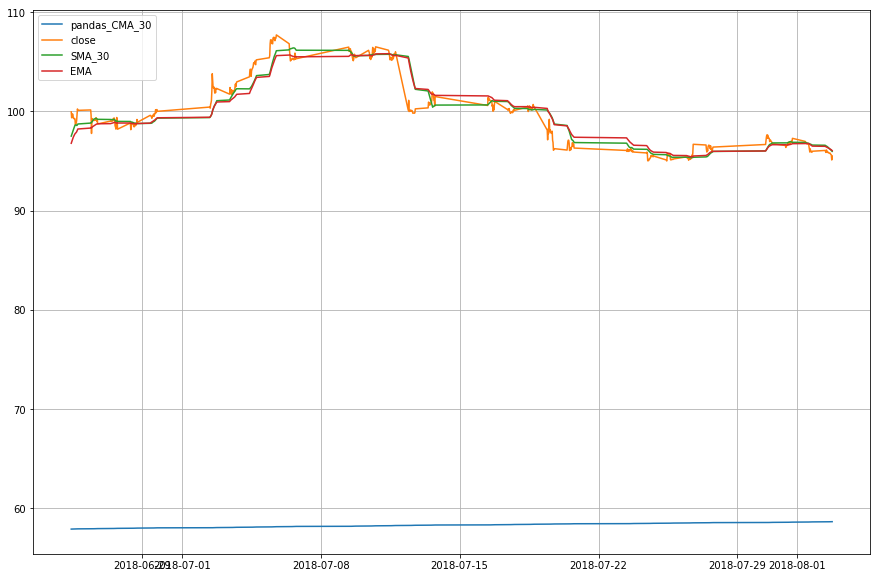

In [44]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['pandas_СMA_30'],label='pandas_СMA_30')
plt.plot(df['close'],label='close')
plt.plot(df['pandas_SMA_30'],label='SMA_30')
plt.plot(df['EMA_'],label='EMA')
plt.legend(loc=2)

In [15]:
# Переименовываю поле без название в PassengerID
#df_titanic = df_titanic.rename(columns={'Unnamed: 0': 'PassengerID'})

In [ ]:
df_titanic.head()

In [7]:
df_tmp = df_titanic.head()

In [9]:
print(map(lambda c: c, df_tmp))

Необходимо подсчитать сколько женщин и мужчин выжило

In [28]:
df_titanic.loc[df_titanic.Survived== 1]

,PassengerID,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0
5,6,"Anderson, Mr Harry",1st,47.00,male,1,0
6,7,"Andrews, Miss Kornelia Theodosia",1st,63.00,female,1,1
8,9,"Appleton, Mrs Edward Dale (Charlotte Lamson)",1st,58.00,female,1,1
11,12,"Astor, Mrs John Jacob (Madeleine Talmadge Force)",1st,19.00,female,1,1
12,13,"Aubert, Mrs Leontine Pauline",1st,NaN,female,1,1
13,14,"Barkworth, Mr Algernon H",1st,NaN,male,1,0
15,16,"Baxter, Mrs James (Helene DeLaudeniere Chaput)",1st,50.00,female,1,1
18,19,"Beckwith, Mr Richard Leonard",1st,37.00,male,1,0


In [31]:
df_titanic.groupby(['Sex', 'Survived'])['PassengerID'].count()

Sex     Survived
female  0           154
        1           308
male    0           709
        1           142
Name: PassengerID, dtype: int64

In [ ]:
А теперь проанализируем в разрезе класса кабины:

In [33]:
print(df_titanic.groupby(['PClass', 'Survived'])['PassengerID'].count())

PClass  Survived
*       0             1
1st     0           129
        1           193
2nd     0           160
        1           119
3rd     0           573
        1           138
Name: PassengerID, dtype: int64


In [34]:
pvt = df_titanic.pivot_table(index=['Sex'], columns=['PClass'], values='Name', aggfunc='count')

In [35]:
pvt

PClass,*,1st,2nd,3rd
Sex,,,,
female,NaN,143.0,107.0,212.0
male,1.0,179.0,172.0,499.0


In [ ]:
Пример про страны

In [ ]:
from pandas import read_csv
df1 = read_csv("df1.txt")
df2 = read_csv("df2.txt",";") 

In [10]:
print(df1)
print(df2)

   shop  qty
0   427    3
1   707    4
2   957    2
3   437    1
   shop   country     name
0   347   Украина     Киев
1   427        РФ   Самара
2   707  Беларусь    Минск
3   957        РФ  Иркутск
4   437        РФ   Москва


In [9]:
country = [u'Украина',u'РФ',u'Беларусь',u'РФ',u'РФ']
df2.insert(1,'country',country) 

In [13]:
print(df2)

   shop  qty
0   427    3
1   707    4
2   957    2
3   437    1
   shop   country     name
0   347   Украина     Киев
1   427        РФ   Самара
2   707  Беларусь    Минск
3   957        РФ  Иркутск
4   437        РФ   Москва


In [12]:
print(df2.country)

0     Украина
1          РФ
2    Беларусь
3          РФ
4          РФ
Name: country, dtype: object


In [30]:
t = df2[df2.country == u'Украина']
t.shop = 345

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [37]:
df2.append(t)

,shop,country,name
0,347,Украина,Киев
1,427,РФ,Самара
2,707,Беларусь,Минск
3,957,РФ,Иркутск
4,437,РФ,Москва
0,345,Украина,Киев


In [38]:
res = df2.merge(df1, 'left', on='shop')

In [41]:
print(df2)
print(df1)
print(res)

   shop   country     name
0   347   Украина     Киев
1   427        РФ   Самара
2   707  Беларусь    Минск
3   957        РФ  Иркутск
4   437        РФ   Москва
   shop  qty
0   427    3
1   707    4
2   957    2
3   437    1
   shop   country     name  qty
0   347   Украина     Киев  NaN
1   427        РФ   Самара  3.0
2   707  Беларусь    Минск  4.0
3   957        РФ  Иркутск  2.0
4   437        РФ   Москва  1.0


In [3]:
res.pivot_table(['qty'],['country'], aggfunc='sum', fill_value = 0)

NameError: name 'res' is not defined

In [1]:
import pandas as pd
import numpy as np
series = pd.Series(data=[111, 222, 3], index = ['one','two','three'])
#or even
series = pd.Series([111, 222, 3])

In [2]:
print(series['one'])
or
print(series[0])
#Multiple columns
print(series[['one','two']]

SyntaxError: invalid syntax (<ipython-input-2-d2bfc27d0f1a>, line 2)